# Capstone Project

## Part 1 - Data Investigation and Analysis

### Task 1 - Assimilate the business scenario and articulate testable hypotheses.

Take what you have read from the stories and from what you know about the business scenario and, in your own words, carefully re-state the business opportunity. Given the stated opportunity, enumerate the testable hypotheses.

AAVAIL is looking to increase revenues - part of this driver is to adopt a new al la carte model of subscription - but this also has risks of decreasing revenues if we fail to attract new users and older users subscribe to less options.

For this we would like to help answer the managers' hill statement enabling them to accurately predict next month's revenue in a country.  This will enable them to identify potential issues before they occur.

### Task 2 -  State the ideal data to address the business opportunity and clarify the rationale for needing specific data.

Note that this step is carried out before you read in the data. It helps clarify exactly what your are looking for in the data and it helps provide context for what the feature matrix and targets will look like.

The ideal data for this model will be detailed usage data for each customer as well as associated subscriptions.  Ideally we should be able to identify if usage is leading to increased subscriptions or to churn/reduction in subscriptions.

Data must also be split out per country.

### TASK 3 - Create a python script to extract relevant data from multiple data sources, automating the process of data ingestion.
From within a Python module there should be a function that reads in the data, attempts to catch common input errors and returns a feature matrix (NumPy array or Pandas DataFrame) that will subsequently be used as a starting point for EDA and modeling.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import os as os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from solution_guidance import cslib

In [2]:
IMAGE_DIR = os.path.join("..","images")
TRAIN_DATA_DIR = os.path.join("..","cs-train")

In [3]:
df = cslib.fetch_data(TRAIN_DATA_DIR)

In [6]:
df_ts = cslib.fetch_ts(TRAIN_DATA_DIR)

... processing data for loading


In [8]:
df_ts['all']

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
0,2017-11-01,0,0,0,0,2017-11,0.00
1,2017-11-02,0,0,0,0,2017-11,0.00
2,2017-11-03,0,0,0,0,2017-11,0.00
3,2017-11-04,0,0,0,0,2017-11,0.00
4,2017-11-05,0,0,0,0,2017-11,0.00
...,...,...,...,...,...,...,...
602,2019-06-26,1358,67,999,6420,2019-06,4903.17
603,2019-06-27,1620,80,944,9435,2019-06,5499.38
604,2019-06-28,1027,70,607,5539,2019-06,3570.60
605,2019-06-29,0,0,0,0,2019-06,0.00


In [11]:
columns = ["date","purchases","unique_invoices","unique_streams","total_views","year_month","revenue"]
data = [
    ["2019-06-26",1358,67,999,6420,"2019-06",4903.17],
    ["2019-06-27",1620,80,944,9435,"2019-06",5499.38],
    ["2019-06-28",1027,70,607,5539,"2019-06",3570.60]
    ]
df_test = pd.DataFrame(data, columns=columns)


In [12]:
df_test


,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
0,2019-06-26,1358,67,999,6420,2019-06,4903.17
1,2019-06-27,1620,80,944,9435,2019-06,5499.38
2,2019-06-28,1027,70,607,5539,2019-06,3570.60


### Task 4 - Investigate the relationship between the relevant data, the target and the business metric.

Using the feature matrix and the tools abvailable to you through EDA spend some time to get to know the data.



In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815011 entries, 0 to 815010
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   country       815011 non-null  object        
 1   customer_id   625249 non-null  float64       
 2   day           815011 non-null  int64         
 3   invoice       815011 non-null  object        
 4   month         815011 non-null  int64         
 5   price         815011 non-null  float64       
 6   stream_id     815011 non-null  object        
 7   times_viewed  815011 non-null  int64         
 8   year          815011 non-null  int64         
 9   invoice_date  815011 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 62.2+ MB
None
         customer_id            day          month          price  \
count  625249.000000  815011.000000  815011.000000  815011.000000   
mean    15333.415068      15.064819       6.592718  

In [5]:
missing_data_array = []

df.head()
for col in df.columns:
    missing_count = df[col].isna().sum()
    print("--------------------------------------------------")
    print("Column        : ", col)
    print("Missing values: ", missing_count)
    
    print(df[col].describe())
    missing_data_array.append([col, missing_count])
    
    
print(missing_data_array)
df_missing_data = pd.DataFrame(missing_data_array, columns=['column', 'count'])
df_missing_data

--------------------------------------------------
Column        :  country
Missing values:  0
count             815011
unique                43
top       United Kingdom
freq              751228
Name: country, dtype: object
--------------------------------------------------
Column        :  customer_id
Missing values:  189762
count    625249.000000
mean      15333.415068
std        1698.360788
min       12346.000000
25%       13956.000000
50%       15279.000000
75%       16813.000000
max       18287.000000
Name: customer_id, dtype: float64
--------------------------------------------------
Column        :  day
Missing values:  0
count    815011.000000
mean         15.064819
std           8.788845
min           1.000000
25%           7.000000
50%          15.000000
75%          23.000000
max          31.000000
Name: day, dtype: float64
--------------------------------------------------
Column        :  invoice
Missing values:  0
count     815011
unique     42646
top       537434
freq   

,column,count
0,country,0
1,customer_id,189762
2,day,0
3,invoice,0
4,month,0
5,price,0
6,stream_id,0
7,times_viewed,0
8,year,0
9,invoice_date,0


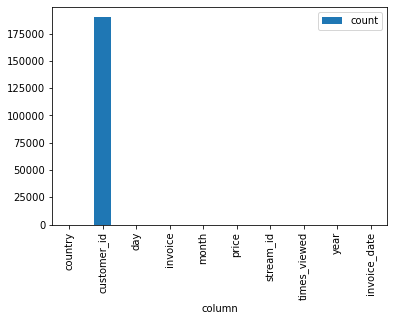

In [6]:
fig = df_missing_data.plot(kind='bar', x='column')
image_path = os.path.join(IMAGE_DIR,"missing_data.png")
fig.get_figure().savefig(image_path,bbox_inches='tight',pad_inches = 0,dpi=200)

Interesting points:
- Missing values in customer id, this could impact customer level analysis
- Countries has more than 10 entries in it (we are only interested in 10 countries)
- Price contains negative values

These columns warrant futher attention

In [7]:
df.country = df.country.astype('category')
df.invoice_date = df.invoice_date.astype('datetime64')

In [8]:
df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13078.0,28,489436,11,1.25,84596F,8,2017,2017-11-28
1,United Kingdom,NaN,28,489609,11,74.61,DOT,1,2017,2017-11-28
2,United Kingdom,NaN,28,489607,11,3.43,22077,1,2017,2017-11-28
3,United Kingdom,NaN,28,489607,11,3.43,22055,2,2017,2017-11-28
4,United Kingdom,NaN,28,489607,11,8.65,21893,1,2017,2017-11-28


In [9]:
print(df.country.unique())

[United Kingdom, Portugal, Germany, France, EIRE, ..., Canada, Iceland, Saudi Arabia, Czech Republic, European Community]
Length: 43
Categories (43, object): [United Kingdom, Portugal, Germany, France, ..., Iceland, Saudi Arabia, Czech Republic, European Community]


Some countries appear to be "invalid" like the European Community (which overlaps with some countries like "France" and "Germany")

In [10]:
for country in df.country.unique():
    print("--------------------------------------------------")
    print("Country  : ", country)
    print("Count    : ", (df.country == country).sum())


--------------------------------------------------
Country  :  United Kingdom
Count    :  751228
--------------------------------------------------
Country  :  Portugal
Count    :  1815
--------------------------------------------------
Country  :  Germany
Count    :  13336
--------------------------------------------------
Country  :  France
Count    :  9899
--------------------------------------------------
Country  :  EIRE
Count    :  13577
--------------------------------------------------
Country  :  USA
Count    :  266
--------------------------------------------------
Country  :  Belgium
Count    :  2166
--------------------------------------------------
Country  :  Australia
Count    :  1543
--------------------------------------------------
Country  :  Denmark
Count    :  629
--------------------------------------------------
Country  :  Japan
Count    :  514
--------------------------------------------------
Country  :  Netherlands
Count    :  4024
---------------------------

In addition, there are some countries that are "Unspecified"

Most data comes from the UK - there are also plenty of countries with very low data counts.

In [11]:
# Data range
df.invoice_date.max() - df.invoice_date.min()

Timedelta('610 days 00:00:00')

In [12]:
price_pivot = pd.pivot_table(df, values='price', index=['country','invoice_date'], aggfunc={'price' : [np.sum, np.min, np.max, np.mean]})

In [13]:
price_pivot = price_pivot.sort_values(by=['country','invoice_date'])

In [14]:
df[df.price < 0]


,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
180430,United Kingdom,NaN,26,506401,4,-53594.36,B,1,2018,2018-04-26
276274,United Kingdom,NaN,16,516228,7,-44031.79,B,1,2018,2018-07-16
403468,United Kingdom,NaN,17,528059,10,-38925.87,B,1,2018,2018-10-17


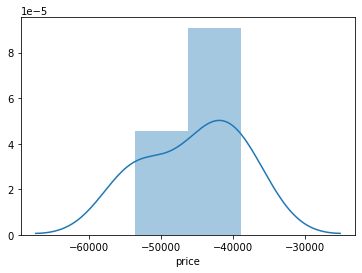

In [15]:
fig = sns.distplot(a=df.price[df.price < 0])
image_path = os.path.join(IMAGE_DIR,"price_below_0.png")
fig.get_figure().savefig(image_path,bbox_inches='tight',pad_inches = 0,dpi=200)

In [16]:
df2 = df[df.customer_id.isna()].copy()

In [17]:
price_pivot__2 = pd.pivot_table(df2, values='price', index=['country'], aggfunc={np.sum, np.min, np.max, 'count'})

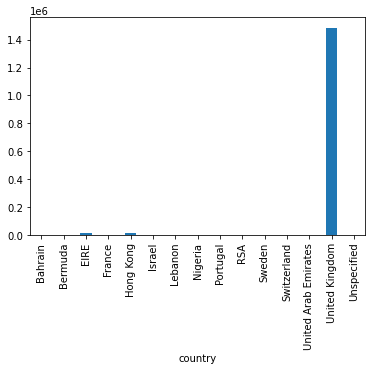

In [18]:
pd.options.display.float_format = '${:,.2f}'.format

price_pivot__2[price_pivot__2['sum'] > 0]
price_pivot__2[price_pivot__2['sum'] > 0]['sum'].plot(kind='bar')


In [19]:
price_pivot__2[price_pivot__2['sum'] > 0]

,amax,amin,count,sum
country,,,,
Bahrain,$14.95,$0.42,67,$268.98
Bermuda,$12.75,$0.21,34,$84.70
EIRE,"$1,917.00",$0.00,1426,"$14,630.78"
France,$16.95,$0.42,79,$169.62
Hong Kong,"$2,583.76",$0.21,276,"$14,452.57"
Israel,$8.50,$1.25,20,$93.69
Lebanon,$39.95,$1.65,13,$116.17
Nigeria,$4.25,$2.55,2,$6.80
Portugal,$9.95,$0.42,77,$239.38


In [20]:
price_pivot__2[price_pivot__2['sum'] > 0]

,amax,amin,count,sum
country,,,,
Bahrain,$14.95,$0.42,67,$268.98
Bermuda,$12.75,$0.21,34,$84.70
EIRE,"$1,917.00",$0.00,1426,"$14,630.78"
France,$16.95,$0.42,79,$169.62
Hong Kong,"$2,583.76",$0.21,276,"$14,452.57"
Israel,$8.50,$1.25,20,$93.69
Lebanon,$39.95,$1.65,13,$116.17
Nigeria,$4.25,$2.55,2,$6.80
Portugal,$9.95,$0.42,77,$239.38


In [21]:
remove_list = ['United Kingdom', 'EIRE', 'Nigeria', 'Bahrain', 'Switzerland', 'Bermuda', 'United Arab Emirates', 'Sweden', 'France']

df2[~df2.country.isin(remove_list)]


,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
167679,Hong Kong,$nan,18,505214,4,$1.65,22243,12,2018,2018-04-18
167680,Hong Kong,$nan,18,505214,4,$1.95,22367,8,2018,2018-04-18
167681,Hong Kong,$nan,18,505214,4,$7.95,20749,2,2018,2018-04-18
167682,Hong Kong,$nan,18,505214,4,$1.25,21791,12,2018,2018-04-18
167683,Hong Kong,$nan,18,505214,4,$2.95,21936,5,2018,2018-04-18
...,...,...,...,...,...,...,...,...,...,...
782753,Unspecified,$nan,5,559521,7,$2.95,22085,1,2019,2019-07-05
782754,Unspecified,$nan,5,559521,7,$2.55,22276,1,2019,2019-07-05
782755,Unspecified,$nan,5,559521,7,$3.75,22570,1,2019,2019-07-05
782758,Unspecified,$nan,5,559521,7,$0.85,22196,7,2019,2019-07-05


In [22]:
### Check new Dataframe without missing customer_id data

In [23]:
df = df.dropna(subset=['customer_id'])

In [24]:
# Data range
df.invoice_date.max() - df.invoice_date.min()

Timedelta('610 days 00:00:00')

In [25]:
for country in df.country.unique():
    print("--------------------------------------------------")
    print("Country  : ", country)
    print("Count    : ", (df.country == country).sum())


--------------------------------------------------
Country  :  United Kingdom
Count    :  563804
--------------------------------------------------
Country  :  Portugal
Count    :  1738
--------------------------------------------------
Country  :  Germany
Count    :  13336
--------------------------------------------------
Country  :  France
Count    :  9820
--------------------------------------------------
Country  :  EIRE
Count    :  12151
--------------------------------------------------
Country  :  USA
Count    :  266
--------------------------------------------------
Country  :  Belgium
Count    :  2166
--------------------------------------------------
Country  :  Australia
Count    :  1543
--------------------------------------------------
Country  :  Denmark
Count    :  629
--------------------------------------------------
Country  :  Japan
Count    :  514
--------------------------------------------------
Country  :  Netherlands
Count    :  4024
---------------------------

In [26]:
df[df.price > 10000]

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
134998,United Kingdom,"$12,918.00",20,502264,3,"$10,953.50",M,1,2018,2018-03-20
135014,United Kingdom,"$12,918.00",20,502262,3,"$10,953.50",M,2,2018,2018-03-20
135015,United Kingdom,"$12,918.00",20,502263,3,"$10,953.50",M,1,2018,2018-03-20
241825,United Kingdom,"$17,399.00",14,512770,6,"$25,111.09",M,2,2018,2018-06-14
341996,United Kingdom,"$14,063.00",13,522793,9,"$10,468.80",M,1,2018,2018-09-13
358676,United Kingdom,"$14,063.00",24,524159,9,"$10,468.80",M,1,2018,2018-09-24
374733,United Kingdom,"$14,063.00",2,525398,10,"$10,468.80",M,0,2018,2018-10-02
748141,United Kingdom,"$15,098.00",7,556445,6,"$38,970.00",M,1,2019,2019-06-07


In [27]:
price_pivot_2 = pd.pivot_table(df, values=['price', 'times_viewed'], index=['country','invoice_date'],aggfunc={ 'price':[np.sum, 'count'], 'times_viewed':np.sum})

In [28]:
price_pivot_2[price_pivot_2["price"]["count"] > 0]

price         times_viewed
                         count     sum          sum
country     invoice_date                           
Australia   2017-11-28      18  $40.40       $97.00
            2017-12-04       2  $10.10        $4.00
            2017-12-05       2   $2.50        $5.00
            2017-12-15       5   $6.65       $40.00
            2018-02-11      15  $27.75      $144.00
...                        ...     ...          ...
Unspecified 2019-05-07      47  $96.81      $503.00
            2019-06-17       9  $42.10       $51.00
            2019-07-11      15  $51.91      $152.00
            2019-07-25     134 $407.17      $277.00
West Indies 2018-08-20      54 $122.77      $313.00

[2483 rows x 3 columns]

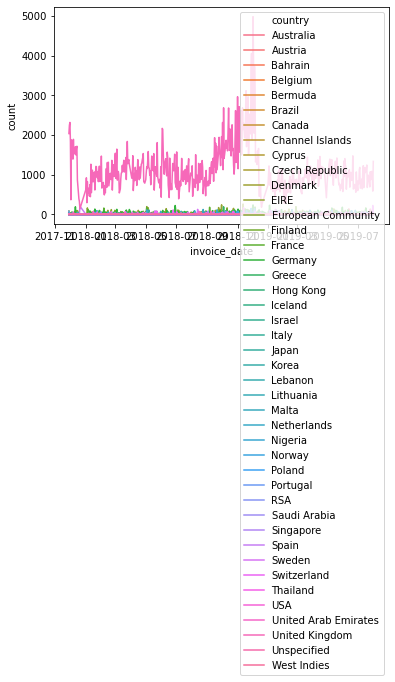

In [29]:
chart_data = price_pivot_2['price']['count'];
fig = sns.lineplot(x=chart_data.index.get_level_values('invoice_date'),y=chart_data, hue=chart_data.index.get_level_values('country'))


In [30]:
print(price_pivot_2.index.get_level_values('invoice_date'))
price_pivot_2['price']['count']

DatetimeIndex(['2017-11-28', '2017-11-29', '2017-11-30', '2017-12-01',
               '2017-12-02', '2017-12-03', '2017-12-04', '2017-12-05',
               '2017-12-06', '2017-12-07',
               ...
               '2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24',
               '2019-07-25', '2019-07-26', '2019-07-28', '2019-07-29',
               '2019-07-30', '2019-07-31'],
              dtype='datetime64[ns]', name='invoice_date', length=21285, freq=None)


country      invoice_date
Australia    2017-11-28      18
             2017-11-29       0
             2017-11-30       0
             2017-12-01       0
             2017-12-02       0
                             ..
West Indies  2019-07-26       0
             2019-07-28       0
             2019-07-29       0
             2019-07-30       0
             2019-07-31       0
Name: count, Length: 21285, dtype: int64

In [38]:
price_pivot_by_month = pd.pivot_table(df, values=['price', 'times_viewed'], index=['country','month'],aggfunc={ 'price':[np.sum, 'count'], 'times_viewed':np.sum})

In [39]:
price_pivot_by_month


price           times_viewed
                  count       sum          sum
country     month                             
Australia   1       127   $338.94    $1,208.00
            2       207   $595.43    $2,275.00
            3        46   $515.64      $328.00
            4        36    $92.63      $275.00
            5       181 $2,688.53    $1,567.00
...                 ...       ...          ...
West Indies 8        54   $122.77      $313.00
            9         0      $nan         $nan
            10        0      $nan         $nan
            11        0      $nan         $nan
            12        0      $nan         $nan

[516 rows x 3 columns]

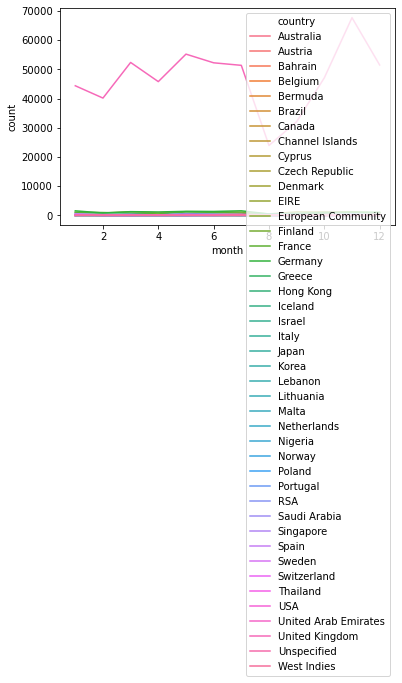

In [41]:
chart_data = price_pivot_by_month['price']['count'];
fig = sns.lineplot(x=chart_data.index.get_level_values('month'),y=chart_data, hue=chart_data.index.get_level_values('country'))


In [33]:
df[df.times_viewed == 0].head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
75,United Kingdom,"$14,558.00",28,489605,11,$7.95,21257,0,2017,2017-11-28
202,Portugal,"$12,758.00",28,489599,11,$0.42,21497,0,2017,2017-11-28
278,United Kingdom,"$17,485.00",28,489610,11,$2.95,85123A,0,2017,2017-11-28
403,Germany,"$12,533.00",28,489526,11,$0.85,21238,0,2017,2017-11-28
467,United Kingdom,"$15,299.00",28,489535,11,$19.00,D,0,2017,2017-11-28


In [34]:
from datetime import date, timedelta

In [35]:
date.today()
timedelta(days=18)
date.today() - timedelta(days=400)

datetime.date(2019, 11, 25)

/home/matthew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.08, 'Data Analysis')

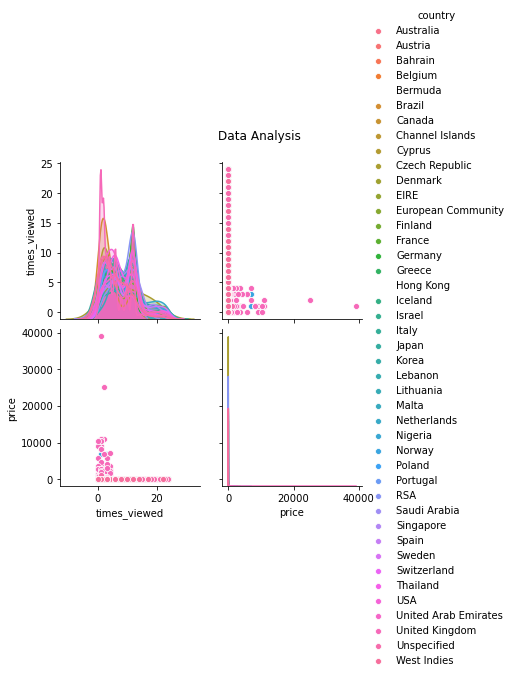

In [36]:
## make a pair plot
columns = ['times_viewed','price']

axes = sns.pairplot(df,vars=columns,hue="country",palette="husl")
axes.fig.suptitle("Data Analysis", y=1.08)


### Task 5 - Articulate your findings using a deliverable with visualizations.
Summarize what you have learned in your investigations using visualizations.

[Text(0, 0, 'Australia'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Bermuda'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Hong Kong'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Korea'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Nigeria'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0,

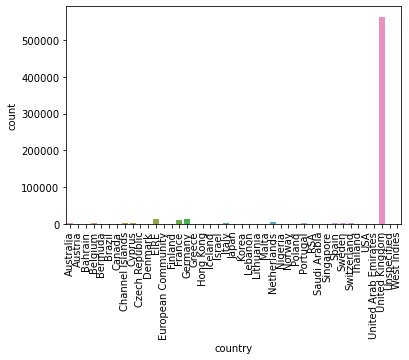

In [37]:
# Finding 1: Most data comes from the UK

plot = sns.countplot(data=df, x='country')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)